In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft
from IPython.display import Audio

In [2]:
# global parameters
duration = 2.0
samplerate = 44.1e3
N = int(samplerate * duration)
t = np.linspace(0, duration, N)
f = np.linspace(0, samplerate, N)

In [3]:
# input signal
fi = 440.0
xi = signal.square(2*np.pi*fi*t)
hi = fft(xi)

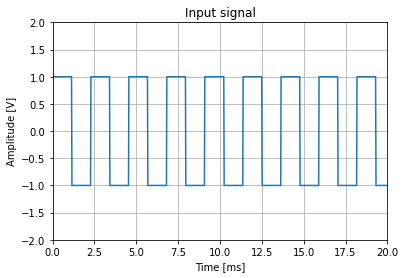

In [4]:
plt.plot(t*1e3, xi)
plt.title('Input signal')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [V]')
plt.xlim(0, 20)
plt.ylim(-2, 2)
plt.grid()

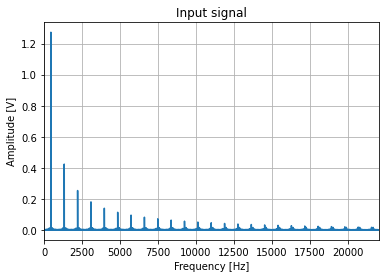

In [5]:
plt.plot(f[0:N//2], 2.0/N * np.abs(hi[0:N//2]))
plt.title('Input signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(0, samplerate / 2)
plt.grid()

In [6]:
Audio(xi, rate=samplerate)

In [7]:
# filter
fc = 6e3
sos = signal.cheby2(12, 100, fc, output='sos', fs=samplerate)
wf, hf = signal.sosfreqz(sos)

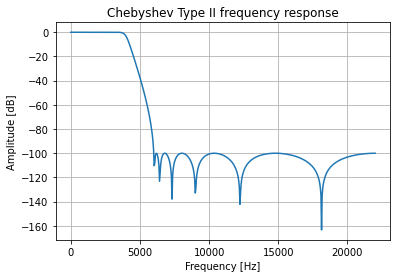

In [8]:
plt.title('Chebyshev Type II frequency response')
plt.plot(samplerate * wf / (2*np.pi), 20*np.log10(np.abs(hf)))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid()

In [9]:
# output signal
xo = signal.sosfiltfilt(sos, xi)
ho = fft(xo)

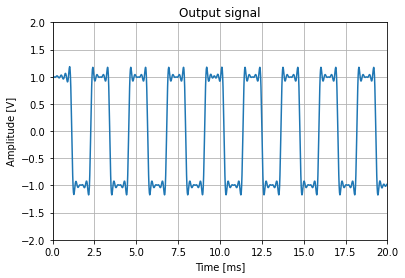

In [10]:
plt.plot(t*1e3, xo)
plt.title('Output signal')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [V]')
plt.xlim(0, 20)
plt.ylim(-2, 2)
plt.grid()

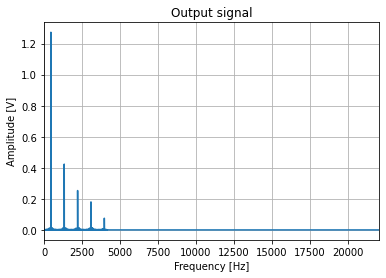

In [11]:
plt.plot(f[0:N//2], 2.0/N * np.abs(ho[0:N//2]))
plt.title('Output signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(0, samplerate / 2)
plt.grid()

In [12]:
Audio(xo, rate=samplerate)

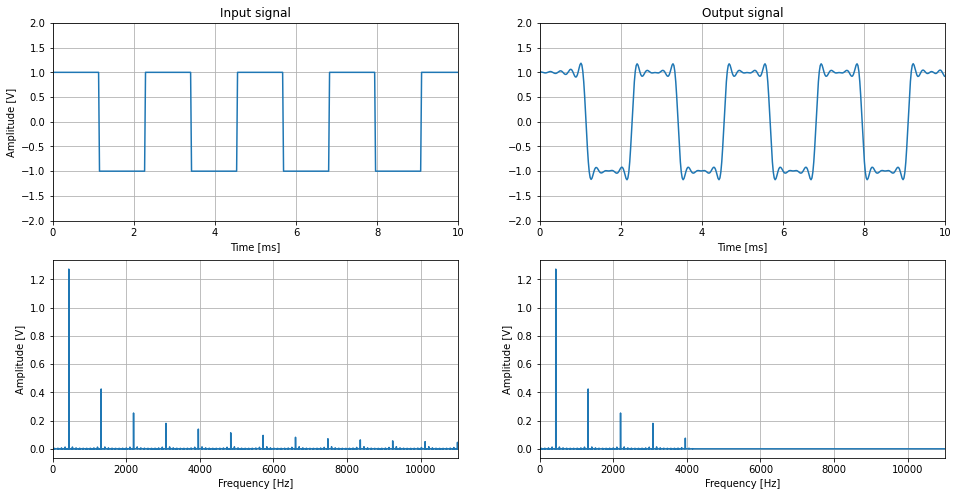

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.plot(t*1e3, xi)
plt.title('Input signal')
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [ms]')
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.grid()

plt.subplot(222)
plt.plot(t*1e3, xo)
plt.title('Output signal')
plt.xlabel('Time [ms]')
plt.xlim(0, 10)
plt.ylim(-2, 2)
plt.grid()

plt.subplot(223)
plt.plot(f[0:N//2], 2.0/N * np.abs(hi[0:N//2]))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(0, samplerate / 4)
plt.grid()

plt.subplot(224)
plt.plot(f[0:N//2], 2.0/N * np.abs(ho[0:N//2]))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(0, samplerate / 4)
plt.grid()

In [14]:
Audio(xi, rate=samplerate)

In [15]:
Audio(xo, rate=samplerate)